<a href="https://colab.research.google.com/github/JoshFowlkes/JoshFowlkes.github.io/blob/master/Project_1_Data_Austin_Crime_%26_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does the old addage that hotter weather equates to higher likelihood of commiting a crime really hold merit in the real world?

In [0]:
import pandas as pd


In [6]:
from google.colab import files
uploaded = files.upload()

Saving austin_weather.csv to austin_weather.csv


In [7]:
weather_df = pd.read_csv('austin_weather.csv')
weather_df.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,


In [0]:
weather_df = weather_df.drop(columns={'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                              'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
                             'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles',
                             'VisibilityLowMiles', 'WindHighMPH', 'WindGustMPH', 'PrecipitationSumInches', 'Events'})

In [9]:
weather_df.head()

,Date,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,WindAvgMPH
0,2013-12-21,74,60,45,75,4
1,2013-12-22,56,48,39,68,6
2,2013-12-23,58,45,32,52,3
3,2013-12-24,61,46,31,56,4
4,2013-12-25,58,50,41,71,2


In [10]:
from google.colab import files
uploaded = files.upload()

Saving austin_crime.csv to austin_crime.csv


In [12]:
crime_df = pd.read_csv('austin_crime.csv')
crime_df.head(5)

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0


In [0]:
crime_df = crime_df.drop(columns = {'address', 'census_tract', 'clearance_date', 'clearance_status', 'council_district_code',
                                    'district', 'latitude', 'location', 'location_description', 'longitude',
                                   'primary_type', 'unique_key', 'x_coordinate', 'y_coordinate', 'zipcode' })



In [0]:
crime_df = crime_df.dropna()

In [15]:
crime_df.head()

,description,timestamp,year
0,THEFT,2015-12-13 00:00:00,2015.0
1,THEFT BY SHOPLIFTING,2015-09-03 00:00:00,2015.0
4,THEFT BY SHOPLIFTING,2014-04-04 00:00:00,2014.0
5,THEFT BY SHOPLIFTING,2015-01-02 00:00:00,2015.0
6,BURGLARY OF VEHICLE,2015-07-28 00:00:00,2015.0


In [16]:
crime_df['timestamp'].value_counts()

2015-07-24 00:00:00    160
2015-08-03 00:00:00    159
2015-12-21 00:00:00    153
2014-10-13 00:00:00    152
2015-02-02 00:00:00    151
2015-09-14 00:00:00    151
2015-07-21 00:00:00    150
2015-08-17 00:00:00    148
2015-05-18 00:00:00    148
2015-06-30 00:00:00    145
2015-07-28 00:00:00    144
2015-06-25 00:00:00    144
2015-01-14 00:00:00    143
2014-05-19 00:00:00    142
2015-08-31 00:00:00    139
2015-12-07 00:00:00    139
2015-11-10 00:00:00    139
2015-12-14 00:00:00    138
2014-08-05 00:00:00    138
2014-07-14 00:00:00    138
2015-03-17 00:00:00    137
2015-07-13 00:00:00    137
2015-01-12 00:00:00    136
2015-11-09 00:00:00    136
2015-05-04 00:00:00    136
2015-01-06 00:00:00    136
2015-09-21 00:00:00    135
2015-11-23 00:00:00    134
2015-05-06 00:00:00    134
2015-08-07 00:00:00    134
                      ... 
2015-01-17 00:00:00     67
2014-06-08 00:00:00     67
2015-01-11 00:00:00     66
2014-11-30 00:00:00     66
2015-02-27 00:00:00     66
2015-08-15 00:00:00     66
2

In [17]:
weather_df.head(5)

,Date,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,WindAvgMPH
0,2013-12-21,74,60,45,75,4
1,2013-12-22,56,48,39,68,6
2,2013-12-23,58,45,32,52,3
3,2013-12-24,61,46,31,56,4
4,2013-12-25,58,50,41,71,2


In [18]:
crime_df = crime_df.sort_values(by='timestamp', ascending=True)
crime_df.head(5)

,description,timestamp,year
137343,THEFT FROM AUTO,2014-01-01 00:00:00,2014.0
129269,BURGLARY OF VEHICLE,2014-01-01 00:00:00,2014.0
34477,DEADLY CONDUCT,2014-01-01 00:00:00,2014.0
50032,BURGLARY OF VEHICLE,2014-01-01 00:00:00,2014.0
120171,THEFT,2014-01-01 00:00:00,2014.0


In [0]:
# getting front end to 2014 jan 1
weather_df = weather_df.iloc[11:]

In [0]:
# getting back end to 2015 dec 31
weather_df = weather_df.iloc[:-578]

In [21]:
weather_df.tail(5)

,Date,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,WindAvgMPH
736,2015-12-27,73,55,36,89,10
737,2015-12-28,46,41,36,75,8
738,2015-12-29,49,43,37,74,3
739,2015-12-30,57,49,41,80,4
740,2015-12-31,53,46,39,78,6


In [22]:
# boom boom all dates are equal on both sides
crime_df.tail()

,description,timestamp,year
10278,BURGLARY OF RESIDENCE,2015-12-31 00:00:00,2015.0
92479,THEFT BY SHOPLIFTING,2015-12-31 00:00:00,2015.0
3138,AGG ASSAULT,2015-12-31 00:00:00,2015.0
120663,BURGLARY OF VEHICLE,2015-12-31 00:00:00,2015.0
146242,THEFT,2015-12-31 00:00:00,2015.0


In [0]:
crime_df = crime_df.rename(columns = {'timestamp' : 'Date'})

In [24]:
crime_df.head()

,description,Date,year
137343,THEFT FROM AUTO,2014-01-01 00:00:00,2014.0
129269,BURGLARY OF VEHICLE,2014-01-01 00:00:00,2014.0
34477,DEADLY CONDUCT,2014-01-01 00:00:00,2014.0
50032,BURGLARY OF VEHICLE,2014-01-01 00:00:00,2014.0
120171,THEFT,2014-01-01 00:00:00,2014.0


In [25]:
weather_df.head()

,Date,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,WindAvgMPH
11,2014-01-01,69,54,39,68,4
12,2014-01-02,55,44,33,55,8
13,2014-01-03,58,43,28,49,4
14,2014-01-04,71,57,42,68,7
15,2014-01-05,59,47,34,59,10


In [0]:
crime_df_copy = crime_df

In [0]:
crime_df_copy['Date'] = crime_df['Date'].map(lambda x: x.lstrip('00:00:00').rstrip(' 00:00:00'))

In [28]:
crime_df_copy.head()

,description,Date,year
137343,THEFT FROM AUTO,2014-01-01,2014.0
129269,BURGLARY OF VEHICLE,2014-01-01,2014.0
34477,DEADLY CONDUCT,2014-01-01,2014.0
50032,BURGLARY OF VEHICLE,2014-01-01,2014.0
120171,THEFT,2014-01-01,2014.0


In [0]:
crime_df = crime_df_copy

In [0]:
merged = pd.merge(crime_df, weather_df, how='inner')

In [31]:

print(merged.shape)
merged.head(10000)

(66591, 8)


,description,Date,year,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,WindAvgMPH
0,THEFT FROM AUTO,2014-01-01,2014.0,69,54,39,68,4
1,BURGLARY OF VEHICLE,2014-01-01,2014.0,69,54,39,68,4
2,DEADLY CONDUCT,2014-01-01,2014.0,69,54,39,68,4
3,BURGLARY OF VEHICLE,2014-01-01,2014.0,69,54,39,68,4
4,THEFT,2014-01-01,2014.0,69,54,39,68,4
5,AGG ASSAULT WITH MOTOR VEH,2014-01-01,2014.0,69,54,39,68,4
6,THEFT,2014-01-01,2014.0,69,54,39,68,4
7,BURGLARY OF VEHICLE,2014-01-01,2014.0,69,54,39,68,4
8,THEFT OF AUTO PARTS,2014-01-01,2014.0,69,54,39,68,4
9,RAPE,2014-01-01,2014.0,69,54,39,68,4


In [32]:
merged['Date'].value_counts()[:40].plot

In [33]:
description_values = merged['description'].value_counts()
description_values

THEFT                             19744
BURGLARY OF VEHICLE               17619
THEFT BY SHOPLIFTING               7589
AUTO THEFT                         3797
BURGLARY OF RESIDENCE              2925
THEFT OF BICYCLE                   2604
BURGLARY NON RESIDENCE             1301
AGG ASSAULT                        1178
THEFT FROM AUTO                    1013
AGG ASLT STRANGLE/SUFFOCATE         988
THEFT OF LICENSE PLATE              836
THEFT FROM PERSON                   788
AGG ROBBERY/DEADLY WEAPON           757
ROBBERY BY ASSAULT                  661
AGG ASSAULT FAM/DATE VIOLENCE       625
RAPE                                597
THEFT FROM BUILDING                 472
THEFT OF AUTO PARTS                 433
THEFT OF METAL                      383
THEFT OF VEHICLE/OTHER              334
BURG NON RESIDENCE SHEDS            233
AGG ASLT ENHANC STRANGL/SUFFOC      217
BURGLARY OF COIN-OP MACHINE         217
DEADLY CONDUCT                      201
AGG RAPE OF A CHILD                 169


In [34]:
merged.isna().sum()

description           0
Date                  0
year                  0
TempHighF             0
TempAvgF              0
TempLowF              0
HumidityAvgPercent    0
WindAvgMPH            0
dtype: int64

In [35]:
merged.shape

(66591, 8)

(0, 45)

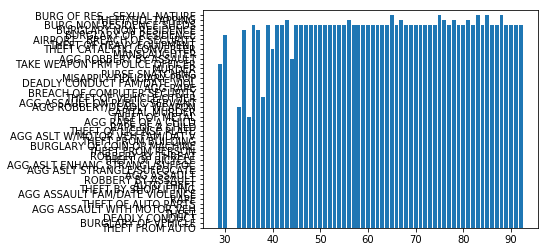

In [36]:
import matplotlib.pyplot as plt


<BarContainer object of 66591 artists>

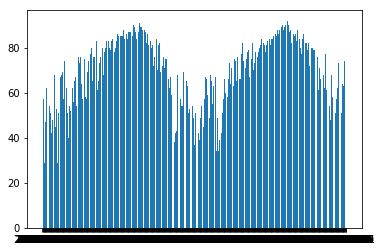

In [37]:
# from here on out, was trial and error with various plots to try and extract meaningful data 
plt.bar(merged['Date'], merged['TempAvgF'])

<Figure size 7200x7200 with 0 Axes>

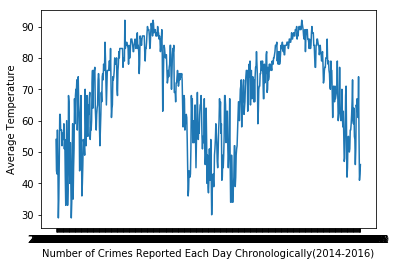

<Figure size 7200x7200 with 0 Axes>

In [39]:
plt.plot(merged['Date'], merged['TempAvgF'])
plt.xlabel('Number of Crimes Reported Each Day Chronologically(2014-2016)')
plt.ylabel('Average Temperature')
plt.figure(figsize=(100,100))

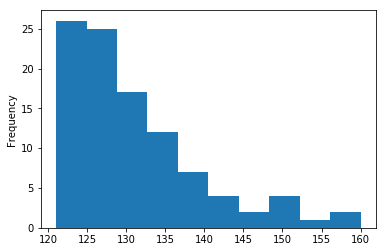

In [41]:
# sorting by most high number in a day
merged['Date'].value_counts()[:100].plot('hist')

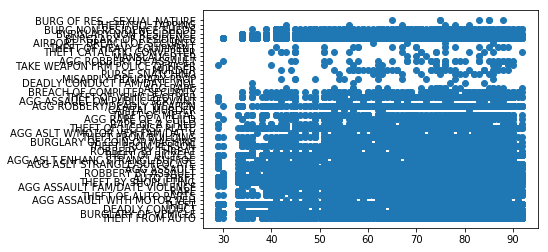

In [42]:
plt.scatter(merged['TempAvgF'], merged['description'] )

In [0]:
import pandas as pd
import matplotlib.style as style

In [0]:
# making a column of random samples 
merged['random_sample'] = merged['description'].sample(n=100, random_state=1)


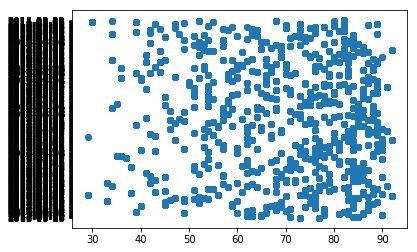

In [50]:
merged_copy = merged 

import random 
import numpy as np
import matplotlib.pyplot as plt 


merged_copy = merged.iloc[np.random.choice(np.arange(len(merged)), 7000, False)]

plt.scatter(merged_copy['TempAvgF'], merged_copy['Date'] )

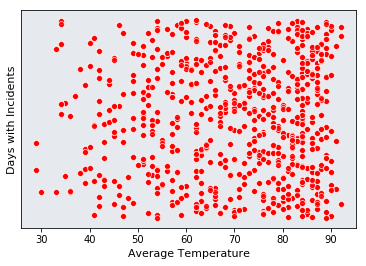

In [51]:
import seaborn as sns

merged_copy = merged
# taking a random sample from the massive dataframe 
merged_copy = merged.iloc[np.random.choice(np.arange(len(merged)), 20000, False)]

fig=plt.figure()


ax = sns.scatterplot(merged_copy['TempAvgF'], merged_copy['Date'], color='red', edgecolors='black', alpha=.8)
ax.set_yticks([])
plt.ylabel('Days with Incidents', fontsize=11, fontweight='450')
plt.xlabel('Average Temperature', fontsize=11, fontweight='450')

fig.patch.set_facecolor('white')
ax.set(facecolor='#e6e9ed')
plt.show()

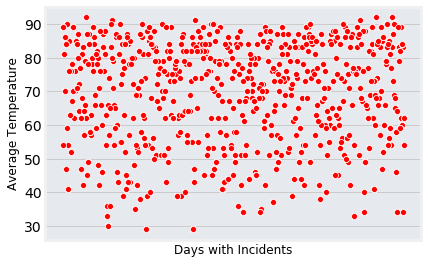

In [70]:

style.use('fivethirtyeight')
fig=plt.figure()

ax = sns.scatterplot(merged_copy['Date'], merged_copy['TempAvgF'], color='red')

plt.xlabel('Days with Incidents', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)



ax.set_xticks([])

fig.patch.set_facecolor('white')
ax.set(facecolor='#e6e9ed')

plt.show()

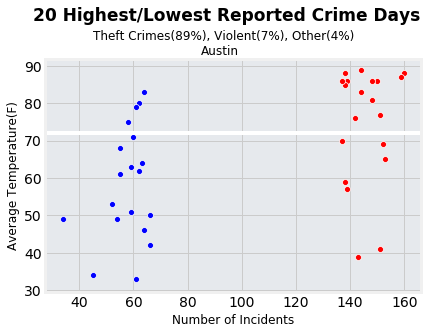

In [66]:
x1 = [160, 159, 153, 152, 151, 151, 150, 148, 148, 144, 144, 143, 142, 139, 139,
    138, 138, 138, 137, 137]    
x2 = [66,66,64,64,63,62,62,62, 61,61,60,59,59,58,55,55,54,52, 45, 34]

y1 = [88, 87, 65, 69, 77, 41, 86, 81, 86, 83, 89, 39, 76, 57, 86, 59, 88, 85, 86, 70]  
y2 = [50, 42, 46, 83, 64, 80, 62, 62, 79, 33, 71, 51, 63, 75, 61, 68, 49, 53, 34, 49]

style.use('fivethirtyeight')
fig=plt.figure()

ax = sns.scatterplot(x1, y1, color='red') 
ax = sns.scatterplot(x2, y2, color='blue')

plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Average Temperature(F)', fontsize=12)

plt.text(x=23, y=102, s='20 Highest/Lowest Reported Crime Days', fontsize=17, fontweight='bold')
plt.text(x=45, y=97, s='Theft Crimes(89%), Violent(7%), Other(4%)', fontsize=12)
plt.text(x=85, y=93, s='Austin', fontsize=12)

ax.axhline(y=72, color='white')
 

fig.patch.set_facecolor('white')
ax.set(facecolor='#e6e9ed')

plt.show()

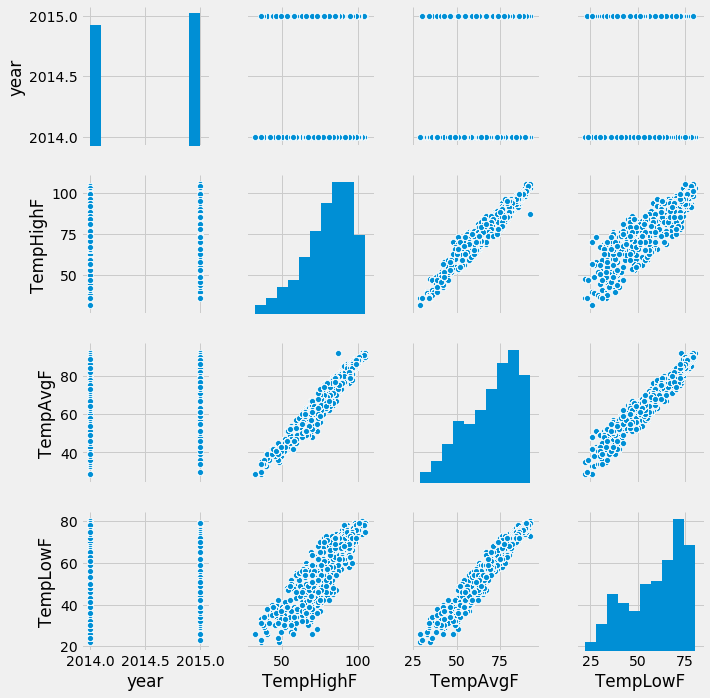

In [69]:
sns.pairplot(merged)